In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)

/home/sunxin/miniconda3/envs/qinhanmin-test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sunxin/miniconda3/envs/qinhanmin-test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sunxin/miniconda3/envs/qinhanmin-test/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sunxin/minico

1.13.2
2.2.4


Using TensorFlow backend.


In [2]:
import keras
import numpy as np
from keras.datasets import reuters
from keras import preprocessing
from keras import models
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
max_words = 1000
batch_size = 16
epochs = 40

In [4]:
def create_network(n_dense=6,
                   dense_units=16,
                   activation='selu',
                   dropout=layers.AlphaDropout,
                   dropout_rate=0.1,
                   kernel_initializer='lecun_normal',
                   optimizer='adam',
                   num_classes=1,
                   max_words=max_words):
    """Generic function to create a fully-connected neural network.
    # Arguments
        n_dense: int > 0. Number of dense layers.
        dense_units: int > 0. Number of dense units per layer.
        dropout: keras.layers.Layer. A dropout layer to apply.
        dropout_rate: 0 <= float <= 1. The rate of dropout.
        kernel_initializer: str. The initializer for the weights.
        optimizer: str/keras.optimizers.Optimizer. The optimizer to use.
        num_classes: int > 0. The number of classes to predict.
        max_words: int > 0. The maximum number of words per data point.
    # Returns
        A Keras model instance (compiled).
    """
    model = models.Sequential()
    model.add(layers.Dense(dense_units, input_shape=(max_words,),
                           kernel_initializer=kernel_initializer))
    model.add(layers.Activation(activation))
    model.add(dropout(dropout_rate))

    for i in range(n_dense - 1):
        model.add(layers.Dense(dense_units, kernel_initializer=kernel_initializer))
        model.add(layers.Activation(activation))
        model.add(dropout(dropout_rate))

    model.add(layers.Dense(num_classes))
    model.add(layers.Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [5]:
network1 = {
    'n_dense': 6,
    'dense_units': 16,
    'activation': 'relu',
    'dropout': layers.Dropout,
    'dropout_rate': 0.5,
    'kernel_initializer': 'glorot_uniform',
    'optimizer': 'sgd'
}

network2 = {
    'n_dense': 6,
    'dense_units': 16,
    'activation': 'selu',
    'dropout': layers.AlphaDropout,
    'dropout_rate': 0.1,
    'kernel_initializer': 'lecun_normal',
    'optimizer': 'sgd'
}

In [6]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

print('Vectorizing sequence data...')
tokenizer = preprocessing.text.Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Loading data...
8982 train sequences
2246 test sequences
46 classes
Vectorizing sequence data...
x_train shape: (8982, 1000)
x_test shape: (2246, 1000)
Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (8982, 46)
y_test shape: (2246, 46)


In [7]:
print('Building network 1...')

model1 = create_network(num_classes=num_classes, **network1)
history_model1 = model1.fit(x_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.1)

score_model1 = model1.evaluate(x_test,
                               y_test,
                               batch_size=batch_size,
                               verbose=1)

Building network 1...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 8083 samples, validate on 899 samples
Epoch 1/40
8083/8083 [==============================] - 4s 480us/step - loss: 3.3699 - acc: 0.3304 - val_loss: 2.9045 - val_acc: 0.3315
Epoch 2/40
8083/8083 [==============================] - 3s 313us/step - loss: 2.7354 - acc: 0.3496 - val_loss: 2.6015 - val_acc: 0.3315
Epoch 3/40
8083/8083 [==============================] - 3s 327us/step - loss: 2.5474 - acc: 0.3438 - val_loss: 2.4792 - val_acc: 0.3315
Epoch 4/40
8083/8083 [==============================] - 3s 320us/step - loss: 2.4294 - acc: 0.3462 - val_loss: 2.3281 - val_acc: 0.3315
Epoch 5/40
8083/8083 [==============================] - 3s 328us/step - loss: 2.3449 - acc: 0.3486 - val_loss: 2.2079 - val_acc: 0.3315
Epoch 6/40
8083/

In [8]:
print('Building network 2...')
model2 = create_network(num_classes=num_classes, **network2)

history_model2 = model2.fit(x_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_split=0.1)

score_model2 = model2.evaluate(x_test,
                               y_test,
                               batch_size=batch_size,
                               verbose=1)

Building network 2...
Train on 8083 samples, validate on 899 samples
Epoch 1/40
8083/8083 [==============================] - 4s 452us/step - loss: 2.8713 - acc: 0.2770 - val_loss: 2.7845 - val_acc: 0.3415
Epoch 2/40
8083/8083 [==============================] - 3s 392us/step - loss: 2.3333 - acc: 0.3635 - val_loss: 2.1801 - val_acc: 0.3915
Epoch 3/40
8083/8083 [==============================] - 3s 399us/step - loss: 2.1551 - acc: 0.3876 - val_loss: 2.0762 - val_acc: 0.4171
Epoch 4/40
8083/8083 [==============================] - 3s 399us/step - loss: 2.0572 - acc: 0.4324 - val_loss: 1.9295 - val_acc: 0.5039
Epoch 5/40
8083/8083 [==============================] - 3s 395us/step - loss: 1.9752 - acc: 0.4698 - val_loss: 1.8995 - val_acc: 0.5417
Epoch 6/40
8083/8083 [==============================] - 3s 403us/step - loss: 1.9054 - acc: 0.4950 - val_loss: 1.9376 - val_acc: 0.5484
Epoch 7/40
8083/8083 [==============================] - 3s 396us/step - loss: 1.8457 - acc: 0.5190 - val_loss: 1.86

In [9]:
print('Network 1 results')
print('Hyperparameters:', network1)
print('Test score:', score_model1[0])
print('Test accuracy:', score_model1[1])
print('Network 2 results')
print('Hyperparameters:', network2)
print('Test score:', score_model2[0])
print('Test accuracy:', score_model2[1])

Network 1 results
Hyperparameters: {'n_dense': 6, 'dense_units': 16, 'activation': 'relu', 'dropout': <class 'keras.layers.core.Dropout'>, 'dropout_rate': 0.5, 'kernel_initializer': 'glorot_uniform', 'optimizer': 'sgd'}
Test score: 2.119522125510796
Test accuracy: 0.5325022261798753
Network 2 results
Hyperparameters: {'n_dense': 6, 'dense_units': 16, 'activation': 'selu', 'dropout': <class 'keras.layers.noise.AlphaDropout'>, 'dropout_rate': 0.1, 'kernel_initializer': 'lecun_normal', 'optimizer': 'sgd'}
Test score: 1.5352611582086009
Test accuracy: 0.6718610863757791


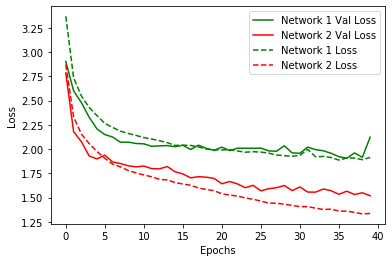

In [10]:
plt.figure()
plt.plot(range(epochs),
         history_model1.history['val_loss'],
         'g-',
         label='Network 1 Val Loss')
plt.plot(range(epochs),
         history_model2.history['val_loss'],
         'r-',
         label='Network 2 Val Loss')
plt.plot(range(epochs),
         history_model1.history['loss'],
         'g--',
         label='Network 1 Loss')
plt.plot(range(epochs),
         history_model2.history['loss'],
         'r--',
         label='Network 2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()